In [1]:
! git clone -b dev https://github.com/motazsaad/infant-cry-care.git

Cloning into 'infant-cry-care'...
remote: Enumerating objects: 7889, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7889 (delta 1), reused 6 (delta 1), pack-reused 7882
Receiving objects: 100% (7889/7889), 474.34 MiB | 24.84 MiB/s, done.
Resolving deltas: 100% (512/512), done.
Checking out files: 100% (14949/14949), done.


In [2]:
! cp -R infant-cry-care/final-weights-cnn-model/ ./

In [3]:
! 7z e ./final-weights-cnn-model/cnn.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan ./final-weights-cnn-model/                                    1 file, 11935604 bytes (12 MiB)

Extracting archive: ./final-weights-cnn-model/cnn.zip
--
Path = ./final-weights-cnn-model/cnn.zip
Type = zip
Physical Size = 11935604
Embedded Stub Size = 4
Total Physical Size = 195436404
Multivolume = +
Volume Index = 7
Volumes = 8

  0%      6% - cnn.sav               12% - cnn.sav               18% - cnn.sav               25% - cnn.sav               30% - cnn.sav               37% - cnn.sav               45% 

# imports 

In [4]:
import pickle
# from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
import librosa 
import matplotlib.pyplot as plt
import numpy as np
from pydantic import BaseModel

In [5]:
classes=['Hungry','Sleepy','Uncomfortable','asphyxia','burp up','lower gas','normal','pain']
# # mainPath = '/content/drive/MyDrive/CryCareDataset/'
# mainPath = '/content/infant-cry-care/infant-cry-dataset/partitioned-data/val'
# exp4Path = mainPath + 'generatedData/Exp4/'
# filename = mainPath + 'cnn.sav'
filename = './cnn.sav'
cnn = pickle.load(open(filename, 'rb'))

In [6]:
def predict(audio_path):
  audiofile, sr = librosa.load(audio_path, sr = 11025, mono = True)
  r = plt.specgram(audiofile, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap='CMRmap', sides='default', mode='default', scale='dB')
  plt.axis('off')
  # name = audiofile.split('/')[-1]
  # filaname = f'{mainPath}predictedImage/{name[:-3].replace(".", "")}.png'
  img_file = 'img.png' # everytime overwrite same file name
  plt.savefig(img_file, backend=None)

  my_image = load_img(img_file, target_size=(256, 256))
  my_image = img_to_array(my_image)
  my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
  # my_image = preprocess_input(my_image) # produce wrong classes 

  y = cnn.predict(my_image)
  # print(y)
  predicted_class = np.argmax(np.round(y),axis=1)[0]
  # print(predicted_class)
  return classes[predicted_class]
  # return {
  #     "label" : classes[predicted_class]
  #     }

In [7]:
print(classes)

['Hungry', 'Sleepy', 'Uncomfortable', 'asphyxia', 'burp up', 'lower gas', 'normal', 'pain']


1/1 [==============================] - 0s 408ms/step


'Sleepy'

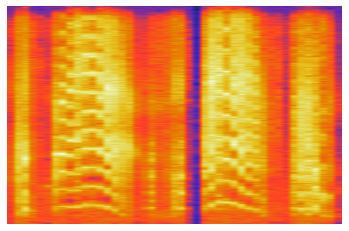

In [8]:
audio_file_path = '/content/infant-cry-care/infant-cry-dataset/partitioned-data/val/Sleepy/11_speed1.wav'
predict(audio_file_path)

In [9]:
import glob
test_files = glob.glob('/content/infant-cry-care/infant-cry-dataset/partitioned-data/val/*/*.wav', recursive=True)

In [10]:
test_labels = [fname.split('/')[-2] for fname in test_files]

In [11]:
import pandas as pd 
test_df = pd.DataFrame({'wav_file': test_files, 'label': test_labels})
test_df.head()

,wav_file,label
0,/content/infant-cry-care/infant-cry-dataset/pa...,normal
1,/content/infant-cry-care/infant-cry-dataset/pa...,normal
2,/content/infant-cry-care/infant-cry-dataset/pa...,normal
3,/content/infant-cry-care/infant-cry-dataset/pa...,normal
4,/content/infant-cry-care/infant-cry-dataset/pa...,normal


In [12]:
test_df.label.value_counts().to_frame()

,label
asphyxia,425
Hungry,368
normal,254
pain,240
Sleepy,187
Uncomfortable,130
burp up,98
lower gas,75


In [13]:
len(test_df)

1777

In [14]:
sample_df = test_df.sample(n=400)

In [15]:
print(len(sample_df))
sample_df.label.value_counts().to_frame()

400


,label
asphyxia,96
Hungry,80
normal,52
pain,49
Sleepy,49
Uncomfortable,34
burp up,28
lower gas,12


In [ ]:
sample_df['prediction'] = sample_df['wav_file'].apply(predict)

In [17]:
sample_df

,wav_file,label,prediction
1613,/content/infant-cry-care/infant-cry-dataset/pa...,asphyxia,asphyxia
0,/content/infant-cry-care/infant-cry-dataset/pa...,normal,normal
101,/content/infant-cry-care/infant-cry-dataset/pa...,normal,normal
1007,/content/infant-cry-care/infant-cry-dataset/pa...,Uncomfortable,Hungry
725,/content/infant-cry-care/infant-cry-dataset/pa...,pain,pain
...,...,...,...
1459,/content/infant-cry-care/infant-cry-dataset/pa...,asphyxia,Hungry
610,/content/infant-cry-care/infant-cry-dataset/pa...,Hungry,Hungry
1470,/content/infant-cry-care/infant-cry-dataset/pa...,asphyxia,Hungry
1093,/content/infant-cry-care/infant-cry-dataset/pa...,Sleepy,Sleepy


In [18]:
sample_df.prediction.value_counts().to_frame()

,prediction
Hungry,206
Uncomfortable,78
Sleepy,61
burp up,44
lower gas,5
normal,3
pain,2
asphyxia,1


In [19]:
sample_df.to_csv('predictions_sample_400.csv', index=False)